# NLP (Natural Language Processing)

## Introducción: 

El procesamiento del lenguaje natural (NLP en sus siglas en inglés) es una rama de la inteligencia artificial que combina conocimientos y técnicas de ciencias de la computación y lingüística. 

El objetivo central de NLP es entender y encontrar los mecanismos más eficaces computacionalmente para la comunicación entre personas y máquinas por medio del lenguaje natural, siendo el lenguaje natural la lengua o idioma hablado o escrito por humanos para propósitos generales de comunicación. 

Una de las tantas aplicaciones de NLP son problemas de clasificación. A continuación algunos ejemplos: 


1.   Análisis de sentimientos: Data una oración, clasificar el nivel de gusto o disgusto por el comunicador

2.   Clasificador de oraciones: Data una oración, clasificar si es una oración mala o buena, si es spam o no es spam, si tiene contenido terrorista o no lo tiene, etc.

En este notebook nos ocuparemos en entender como un algoritmo es capaz de entender un conjunto de oraciones (ósea un texto) y clasificar ese texto en spam o no spam. 



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Cargamos el conjunto de entrenamiento
dataset = pd.read_csv("train.csv")
plt.rcParams["font.size"] = 24
plt.style.use("seaborn-poster")
dataset

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


### Representación de palabras (Word Representation)

El lenguaje de las computadoras es el lenguaje binario, donde mediante combinaciones de unos y ceros, cualquier frase estructurada se puede codificar mediante vectores de unos y ceros. 

Consideremos el siguiente ejemplo:

<center>
    <img src="https://miro.medium.com/max/1348/1*9ZuDXoc2ek-GfHE2esty5A.png" width = "50%">
</center>

 A cada palabra le corresponde un vector $n$-dimensional distinto a cualquier otro vector de otra palabra. Este tipo de vectores se llaman One-Hot. Con base en esto, uno puede definir un diccionario en un idioma. El tamaño del diccionario depende de la aplicación que se requiera. 

 <center>
    <img border = "0" aling = "right" src="https://mk0caiblog1h3pefaf7c.kinstacdn.com/wp-content/uploads/2019/02/bag-of-words.png" width = "25%">
</center>





In [3]:
# Definimos el problema de clasificacion
# 0 : El tuit no es un spam
# 1 : El tuit es un spam

int_label = {1: "real", 0: "fake"}

In [4]:
# Separamos el Texto y la etiqueta
sentences = dataset["text"].tolist()
labels = dataset["target"].tolist()

In [5]:
# Funcion que encuentra la frase de longitud máxima
def max_sequence(array):
    max_temp = len(array[0])
    for i in range(len(array) - 1):
        if len(array[i + 1]) > max_temp:
            max_temp = len(array[i + 1])
    return max_temp

In [6]:
# Separación del conjunto de datos en datos de entrenamiento y prueba
training_size = int(len(sentences) * 0.99)

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [7]:
# Conversion de las etiquetas en arreglos numpy
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [8]:
testing_labels_final.shape

(77,)

### Incrustaciones de Palabras (Word Embeddings)

Cuando codificamos las palabras en vecores one-hot padecemos de la dificultad de que los vectores definidos de ese manera no almacenan información de la palabra ni del contexto. Por ejemplo no hay similitud entre la palabra Rome y Paris:

Definimos por ejemplo $Rome = x_{1}$ ; $Paris = x_{2}$ la distancia entre ambos vectores $d = \sqrt{(x_{1} - x_{2})^2} = 2$ y esto ocurre para cualquier palabra del diccionario.

En términos generales word embedding son técnicas que permiten transformar los vectores one-hot de nuestro vocabulario en vectores más compactos y que contengan información que permitan relacionar conceptos entre palabras. Veamos el siguiente ejemplo:


<center>
    <img src="https://miro.medium.com/max/2598/1*sAJdxEsDjsPMioHyzlN3_A.png" width="75%">
</center>


En este caso, la distancia entre dos vectores embebidos ya no sería 2, ahora podemos tener similitud entre palabras. 

In [9]:
vocab_size = 1000
embedding_dim = 16
max_length = 33
trunc_type = "post"
padding_type = "post"
oov_tok = "<OOV>"

print("max_length :", max_length)

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

max_length : 33


In [10]:
sequences = tokenizer.texts_to_sequences(training_sentences)

In [11]:
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(
    testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type
)

In [12]:
padded.shape

(7536, 33)

* Existen varias técnicas de Word Embedding, algunas son las siguientes: 

1.   Bag of words(BOW)
2.   Word2Vec 
3.   Skip gram


La idea en común de estas técnicas es que utilizan una red neuronal como las que hemos estudiado para aprender los vectores embebidos con base en un contexto. 

Por ejemplo: 

<center>
    <img src="https://blog.baamtu.com/wp-content/uploads/2020/01/Word-embedding-model-1.png" width = "95%">
</center>


In [13]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(6, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 33, 16)            16000     
_________________________________________________________________
flatten (Flatten)            (None, 528)               0         
_________________________________________________________________
dense (Dense)                (None, 6)                 3174      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 19,181
Trainable params: 19,181
Non-trainable params: 0
_________________________________________________________________


In [14]:
num_epochs = 5
history = model.fit(
    padded,
    training_labels_final,
    epochs=num_epochs,
    validation_data=(testing_padded, testing_labels_final),
    verbose=0,
)

In [15]:
hist = pd.DataFrame(history.history)
hist["epoch"] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.629437,0.657245,0.427898,0.831169,0
1,0.460864,0.789544,0.288387,0.857143,1
2,0.390268,0.834262,0.229284,0.922078,2
3,0.345723,0.854034,0.196650,0.922078,3
4,0.301525,0.881768,0.184484,0.922078,4


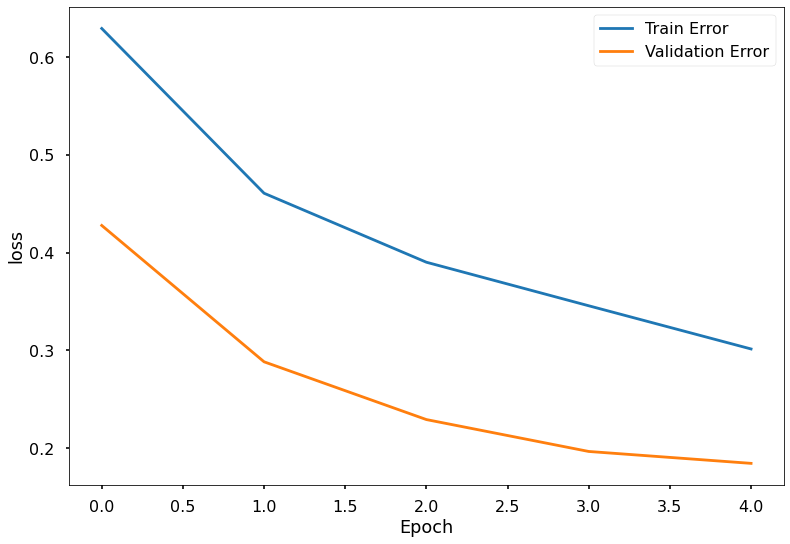

In [16]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist["epoch"] = history.epoch

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("loss")
    plt.plot(hist["epoch"], hist["loss"], label="Train Error")
    plt.plot(hist["epoch"], hist["val_loss"], label="Validation Error")
    plt.legend()
    plt.show()


plot_history(history)

In [17]:
data = pd.read_csv("test.csv")

sentences_ = data["text"].tolist()
id_value = data["id"].tolist()

id_value = np.array(id_value)

sequences_ = tokenizer.texts_to_sequences(sentences_)
padded_ = pad_sequences(sequences_, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [18]:
pred = model.predict(padded_)
# 0.77505

In [19]:
pred.shape

(3263, 1)

In [20]:
print(pred[0])

[0.8204247]


In [21]:
vals = []
for i in range(len(pred[:])):
    if pred[i] > 0.5:
        vals.append(int_label[1])
    else:
        vals.append(int_label[0])

In [22]:
f = open("test.txt", "w")
for i in range(len(vals)):
    if vals[i] != "real":
        f.write(np.str(id_value[i]) + "\t" + np.str(0) + "\n")
    else:
        f.write(np.str(id_value[i]) + "\t" + np.str(1) + "\n")
f.close()

In [23]:
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = training_labels_final.reshape(len(training_labels_final), 1)
y_training = onehot_encoder.fit_transform(integer_encoded)
integer_encoded = testing_labels_final.reshape(len(testing_labels_final), 1)
y_testing = onehot_encoder.fit_transform(integer_encoded)

In [24]:
padded = padded.reshape((-1, max_length, 1))
testing_padded = testing_padded.reshape((-1, max_length, 1))

## Red neuronal para la clasificación

La arquitectura es la siguiente:

<center>
    <img border = "0" align = "right" src="https://www.thepythoncode.com/media/articles/build-spam-classifier-keras-python/network_diagram_jMVQhJh.png" width="25%">
</center>

Hasta ahora hemos hablado como podemos formar un diccionario a partir de palabras, representar las palabras mediante un vector one-hot y transformar los vectores one-hot en vectores embebidos. 

Se pueden seguir varias estrategias para clasificar texto, la que ha tenido más éxito son las redes neuronales recurrentes. Una red neuronal recurrente es una red neuronal como la que hemos visto, pero con la diferencia que integra bucles de retro-alimentación, esto permite que la información fluya en el "tiempo". Las redes neuronales recurrentes son muy útiles cuando nuestros datos son datos sequenciales (texto, comúnmente variables que dependen del tiempo).

Existen 3 variedades de redes recurrentes

1.   RNN -> Recurrent Neuronal Network
2.   GRU -> Gated Recurrent Unit
3.   LSTM -> Long short-term Memory



In [25]:
# In this section we define our neural network model to train
def get_model(max_length, units, lstm_units):
    model = tf.keras.Sequential()
    model.add(
        tf.keras.layers.GRU(
            lstm_units,
            input_shape=[None, 1],
            return_state=False,
            kernel_initializer="glorot_normal",
            return_sequences=True,
        )
    )
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(rate=0.3))
    model.add(tf.keras.layers.GRU(units, return_sequences=False))
    model.add(tf.keras.layers.Dropout(rate=0.5))
    model.add(tf.keras.layers.Dense(units))
    model.add(tf.keras.layers.Dense(2, activation="softmax"))
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    model.summary()
    return model


lstm_units = 32
units = 32
model = get_model(max_length, units, lstm_units)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, None, 32)          3360      
_________________________________________________________________
batch_normalization (BatchNo (None, None, 32)          128       
_________________________________________________________________
dropout (Dropout)            (None, None, 32)          0         
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                6336      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                

In [26]:
num_epochs = 25

history = model.fit(
    padded, y_training, epochs=num_epochs, validation_data=(testing_padded, y_testing), verbose=0
)

hist = pd.DataFrame(history.history)
hist["epoch"] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
20,0.603280,0.680865,0.555348,0.727273,20
21,0.607397,0.680865,0.541318,0.727273,21
22,0.606693,0.680998,0.552685,0.701299,22
23,0.601675,0.683386,0.588655,0.701299,23
24,0.601864,0.683519,0.544703,0.688312,24


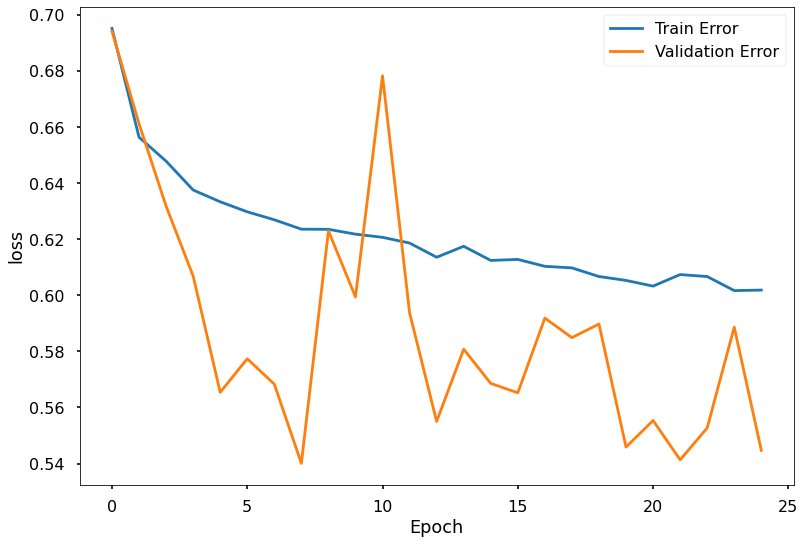

In [27]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist["epoch"] = history.epoch

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("loss")
    plt.plot(hist["epoch"], hist["loss"], label="Train Error")
    plt.plot(hist["epoch"], hist["val_loss"], label="Validation Error")
    plt.legend()
    plt.show()


plot_history(history)